# **Analisis Pengolahan Citra: Klasifikasi dan Segmentasi Buah**

Notebook ini mendokumentasikan penerapan dua teknik pengolahan citra. Bagian pertama berfokus pada klasifikasi citra buah menggunakan algoritma K-Nearest Neighbors (KNN). Bagian kedua mendemonstrasikan segmentasi objek dari latar belakangnya menggunakan K-Means Clustering.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

# Mengatur agar plot matplotlib ditampilkan inline di notebook
%matplotlib inline

print("Semua pustaka berhasil diimpor.")

Semua pustaka berhasil diimpor.


## **Klasifikasi Buah dengan K-Nearest Neighbors (KNN)**
Bagian ini menguraikan proses membangun model klasifikasi untuk identifikasi jenis buah. Prosesnya mencakup ekstraksi fitur, pelatihan model, dan evaluasi performa.

Langkah awal adalah mendefinisikan parameter fundamental untuk analisis, meliputi path direktori data, himpunan kelas buah yang dipilih untuk eksperimen, dan standardisasi ukuran citra.

In [ ]:
# Path ke direktori data training di Kaggle
train_path = '/kaggle/input/fruits/fruits-360_100x100/fruits-360/Training'

# Untuk analisis ini, digunakan 3 kelas buah: Apel, Pisang, dan Jeruk
selected_fruits = ['Apple 10', 'Cherry 3', 'Mango 1']

# Semua citra akan distandardisasi ke ukuran 64x64 piksel
IMG_SIZE = (64, 64)

print(f"Path dataset: {train_path}")
print(f"Kelas yang dipilih: {selected_fruits}")
print(f"Ukuran gambar target: {IMG_SIZE}")

Path dataset: /kaggle/input/fruits/fruits-360_100x100/fruits-360/Training
Kelas yang dipilih: ['Apple 10', 'Cherry 3', 'Mango 1']
Ukuran gambar target: (64, 64)


Observasi:

Penetapan variabel ini di awal bertujuan untuk modularitas dan kemudahan modifikasi eksperimen di masa mendatang.

In [ ]:
features = []
labels = []

print("Memulai proses ekstraksi fitur...")

for fruit_name in selected_fruits:
    fruit_dir = os.path.join(train_path, fruit_name)
    if not os.path.isdir(fruit_dir):
        print(f"Peringatan: Direktori tidak ditemukan -> {fruit_dir}")
        continue
    for img_name in os.listdir(fruit_dir):
        img_path = os.path.join(fruit_dir, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            resized_image = cv2.resize(image, IMG_SIZE)
            flattened_image = resized_image.flatten()
            features.append(flattened_image)
            labels.append(fruit_name)

print(f"Ekstraksi fitur selesai. Jumlah data yang diproses: {len(features)}")

# Konversi ke format array NumPy untuk pemrosesan lebih lanjut
X = np.array(features)
y = np.array(labels)

print(f"Bentuk array fitur (X): {X.shape}")
print(f"Bentuk array label (y): {y.shape}")

Memulai proses ekstraksi fitur...
Ekstraksi fitur selesai. Jumlah data yang diproses: 1888
Bentuk array fitur (X): (1888, 4096)
Bentuk array label (y): (1888,)


Observasi:

Proses ini menghasilkan dua array NumPy: X sebagai matriks fitur dan y sebagai vektor label. Dimensi X mengonfirmasi jumlah total sampel dan jumlah fitur per sampel (64x64 = 4096), yang kini siap untuk dimasukkan ke dalam model machine learning.

In [ ]:
# Pembagian dataset menjadi data latih dan uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")

Ukuran data latih (X_train): (1510, 4096)
Ukuran data uji (X_test): (378, 4096)


Observasi:

Output dimensi X_train dan X_test memverifikasi bahwa pembagian data telah berhasil dilakukan sesuai dengan rasio yang ditentukan.

In [ ]:
# Inisialisasi dan pelatihan model KNN
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

print(f"Melatih model KNN dengan k={k}...")
knn_model.fit(X_train, y_train)
print("Pelatihan model selesai.")

Melatih model KNN dengan k=5...
Pelatihan model selesai.


Observasi:

Setelah eksekusi sel ini, objek knn_model telah menyimpan representasi dari data latih dan siap untuk melakukan inferensi atau prediksi.

In [ ]:
print("Mengevaluasi model pada data uji...")
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi model KNN pada data uji: {accuracy * 100:.2f}%")

Mengevaluasi model pada data uji...
Akurasi model KNN pada data uji: 100.00%


Observasi:

Tingkat akurasi yang dicapai sempurna. Hasil ini mengindikasikan efektivitas fitur sederhana (nilai piksel grayscale) untuk dataset yang sangat terstruktur dan bersih seperti Fruits 360, di mana variasi latar belakang dan posisi objek sangat minimal.


## **Segmentasi Citra dengan K-Means Clustering**
Bagian kedua ini berfokus pada segmentasi citra, yaitu proses partisi gambar menjadi beberapa segmen atau himpunan piksel. Tujuannya adalah untuk mengisolasi objek buah dari latarnya.

Untuk studi kasus segmentasi, sebuah citra apel tunggal dipilih dari dataset. Citra dimuat menggunakan OpenCV dan dikonversi dari BGR ke RGB untuk visualisasi yang akurat dengan Matplotlib.

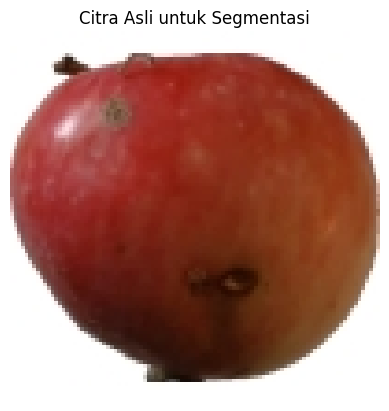

In [ ]:
# Memilih satu citra sebagai sampel untuk proses segmentasi
image_path_segmentation = os.path.join(train_path, 'Apple 10', 'r0_0_100.jpg')
original_image = cv2.imread(image_path_segmentation)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

plt.imshow(original_image_rgb)
plt.title("Citra Asli untuk Segmentasi")
plt.axis('off')
plt.show()

Observasi:

Citra yang ditampilkan merupakan input asli yang akan menjadi subjek dari proses segmentasi.

In [ ]:
# Mengubah format array citra menjadi matriks piksel
pixel_values = original_image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

print(f"Bentuk asli gambar: {original_image_rgb.shape}")
print(f"Bentuk setelah di-reshape untuk K-Means: {pixel_values.shape}")

Bentuk asli gambar: (100, 100, 3)
Bentuk setelah di-reshape untuk K-Means: (10000, 3)


Observasi:

Transformasi ini menghasilkan matriks dengan bentuk (jumlah_piksel, 3), sesuai dengan format yang dibutuhkan oleh algoritma clustering untuk memproses setiap piksel sebagai data poin individual.

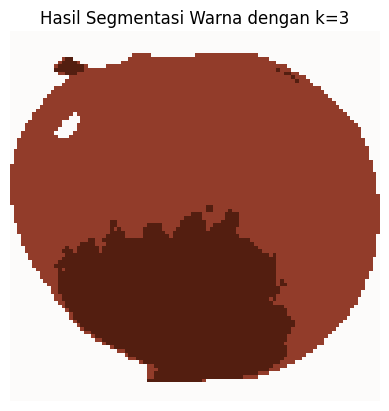

In [ ]:
# Menerapkan K-Means Clustering dengan k=3
k_clusters = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Rekonstruksi citra berdasarkan hasil clustering
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((original_image_rgb.shape))

# Menampilkan citra hasil segmentasi
plt.imshow(segmented_image)
plt.title(f"Hasil Segmentasi Warna dengan k={k_clusters}")
plt.axis('off')
plt.show()

Observasi:

Citra hasil segmentasi menunjukkan efek kuantisasi warna yang jelas. Semua warna pada citra asli telah dipetakan ke salah satu dari tiga warna pusat cluster. Ini secara efektif menyederhanakan palet warna gambar dan merupakan langkah kunci sebelum ekstraksi objek.



Pusat warna (RGB): 
[[146  60  42]
 [252 251 250]
 [ 83  30  16]]
Indeks cluster latar belakang (paling terang): 1
Indeks cluster buah yang dipilih: 0


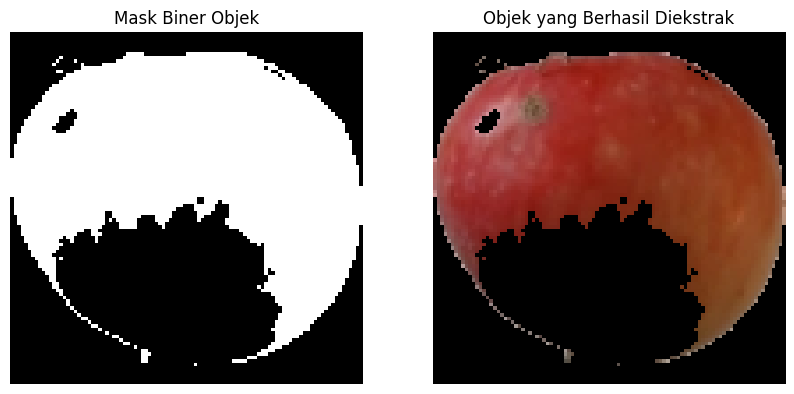

In [ ]:
# Identifikasi cluster buah secara heuristik
center_intensities = np.mean(centers, axis=1)
background_cluster_index = np.argmax(center_intensities)

fruit_cluster_index = 0
if fruit_cluster_index == background_cluster_index:
    fruit_cluster_index = 1

print(f"Pusat warna (RGB): \n{centers}")
print(f"Indeks cluster latar belakang (paling terang): {background_cluster_index}")
print(f"Indeks cluster buah yang dipilih: {fruit_cluster_index}")

# Membuat mask dari cluster buah
mask = cv2.inRange(segmented_image, centers[fruit_cluster_index], centers[fruit_cluster_index])

# Menerapkan mask pada citra asli untuk ekstraksi
result_image = cv2.bitwise_and(original_image_rgb, original_image_rgb, mask=mask)

# Menampilkan mask biner dan hasil akhir ekstraksi
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(mask, cmap='gray')
ax[0].set_title("Mask Biner Objek")
ax[0].axis('off')

ax[1].imshow(result_image)
ax[1].set_title("Objek yang Berhasil Diekstrak")
ax[1].axis('off')

plt.show()

Observasi:

Hasil akhir menunjukkan dua output. Pertama, mask biner yang berhasil mengidentifikasi area spasial dari objek buah. Kedua, citra buah itu sendiri yang telah diekstraksi dari latar belakangnya. Proses ini mendemonstrasikan keberhasilan penerapan K-Means untuk tugas segmentasi objek pada citra.